In [456]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split,
)  # used to split data set into (x, y) train and (x, y) test
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # used to transform data in to stadarization form
from sklearn.metrics import accuracy_score, r2_score
from sklearn.pipeline import Pipeline

X = 6 * np.random.rand(500, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(500, 1)

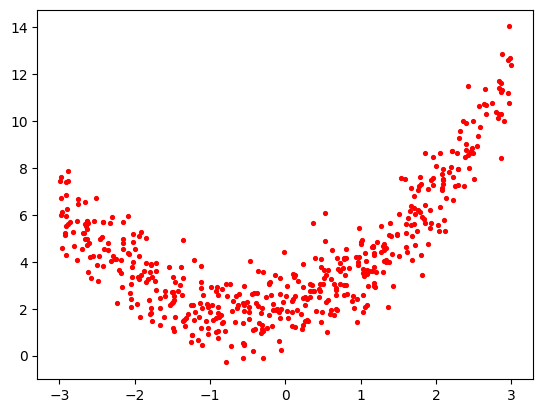

In [457]:
plt.scatter(X, y, marker=".", color="r", s=30)

# spliting data


In [458]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# By linear regression


In [459]:
linear_model = LinearRegression()
linear_model.fit(X=x_train, y=y_train)

print("linear_model coef  = ", linear_model.coef_)
print("linear_model intercept  = ", linear_model.intercept_)

linear_model coef  =  [[0.72797416]]
linear_model intercept  =  [4.23700899]


In [460]:
linear_model_predict = linear_model.predict(X=x_test)
print("linear_model score = ", linear_model.score(X=x_test, y=y_test) * 100, "% ")

linear_model score =  25.878547539032848 % 


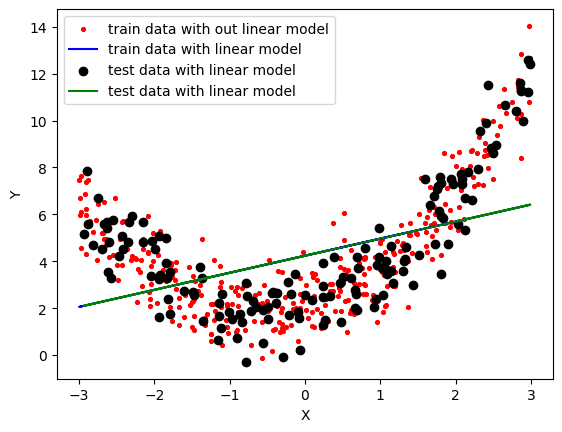

In [461]:
plt.scatter(
    x_train,
    y_train,
    marker=".",
    color="r",
    s=30,
    label="train data with out linear model",
)

plt.plot(
    x_train,
    linear_model.predict(x_train),
    color="b",
    label="train data with linear model",
)

plt.scatter(x_test, y_test, color="black", label="test data with linear model")

plt.plot(x_test, linear_model_predict, color="g", label="test data with linear model")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# let's fit a new PolynomialFeatures model


In [462]:
scaler = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = scaler.fit_transform(X=x_train)
scaler = PolynomialFeatures(degree=2, include_bias=True)
x_test_poly = scaler.fit_transform(X=x_test)
print(len(x_test_poly[0]))  # x^0 + x^1 + x^2
print(len(x_train_poly[0]))  # x^0 + x^1 + x^2

3
3


In [463]:
poly_linear_model = LinearRegression()
poly_linear_model.fit(X=x_train_poly, y=y_train)

print("linear_model coef  = ", poly_linear_model.coef_)
print("linear_model intercept  = ", poly_linear_model.intercept_)

linear_model coef  =  [[0.         0.89189236 0.78358005]]
linear_model intercept  =  [2.09210014]


In [464]:
poly_linear_model_predict = poly_linear_model.predict(X=x_test_poly)
print(
    "linear_model score = ",
    poly_linear_model.score(X=x_test_poly, y=y_test) * 100,
    "% ",
)

linear_model score =  86.65193266411222 % 


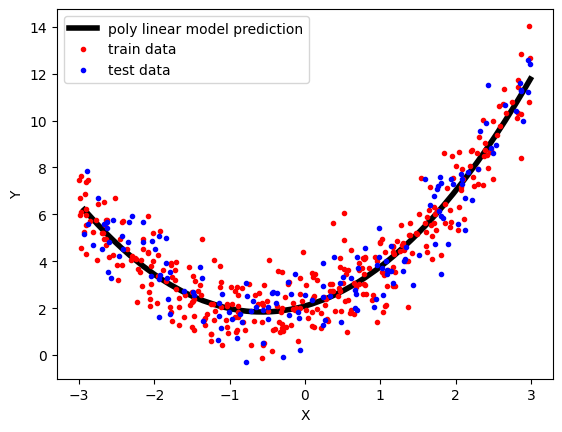

In [465]:
df = pd.DataFrame()
df["test"] = pd.DataFrame(x_test)
df["out"] = pd.DataFrame(poly_linear_model_predict)

sns.lineplot(
    data=df,
    x="test",
    y="out",
    label="poly linear model prediction",
    linewidth=4,
    color="black",
)
plt.plot(x_train, y_train, "r.", label="train data")
plt.plot(x_test, y_test, "b.", label="test data")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend()
plt.show()

# Effect of Degree in Polynomial Regression


In [466]:
def Polynomial_Regression(deg):
    new_test = np.linspace(-3, 3, 200).reshape(200, 1)
    poly = PolynomialFeatures(deg, include_bias=True)
    lin_reg = LinearRegression()
    poly_reg = Pipeline(
        [
            ("Polynomial Features", poly),
            ("Linear Regression", lin_reg),
        ]
    )
    poly_reg.fit(X=X, y=y)
    poly_predict = poly_reg.predict(X=new_test)

    df = pd.DataFrame()

    df["test"] = pd.DataFrame(new_test)
    df["out"] = pd.DataFrame(poly_predict)

    # plotting result
    plt.figure(figsize=(5, 3))
    sns.lineplot(
        data=df,
        x="test",
        y="out",
        label="poly linear model prediction",
        linewidth=2,
        color="black",
    )

    plt.scatter(X, y, color="r", s=5, label="train data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10])
    plt.legend()
    plt.show()

# This is an overfit problem


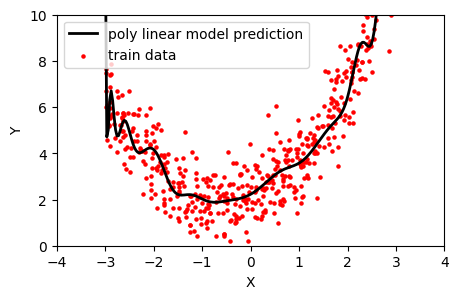

In [467]:
Polynomial_Regression(30)

# This is an underfit problem


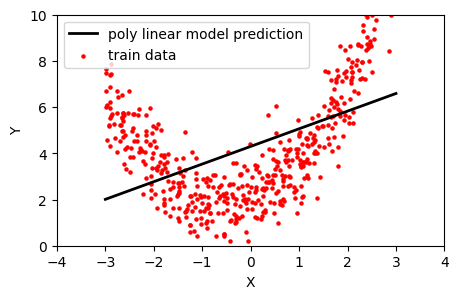

In [468]:
Polynomial_Regression(1)

# right fitting model


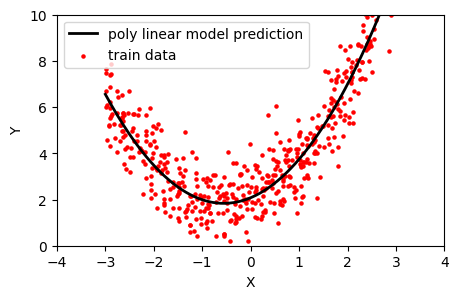

In [469]:
Polynomial_Regression(2)